In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv("datasets/emissions.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.564523,58.567857,16.0,208.0,246.0,288.0,522.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

<Axes: >

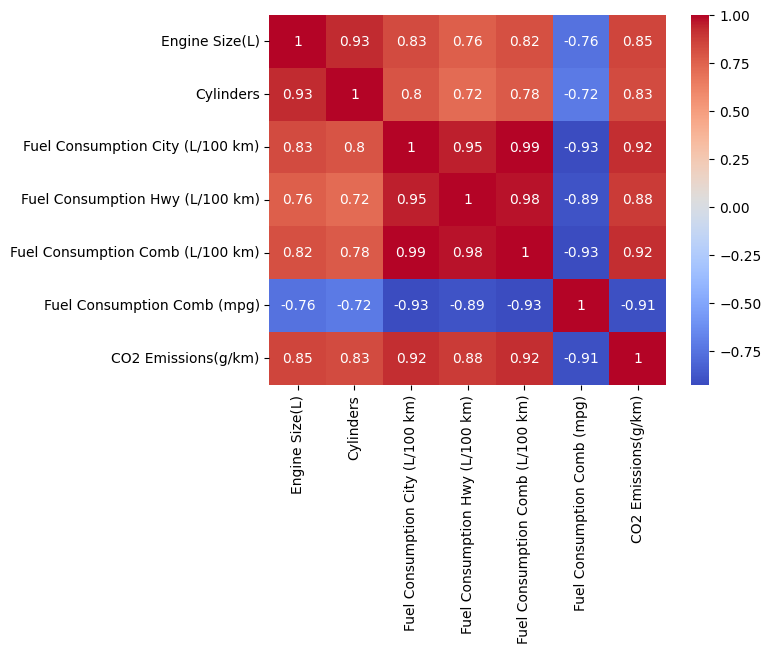

In [6]:
corr_data = df[[
    "Engine Size(L)", 
    "Cylinders", 
    "Fuel Consumption City (L/100 km)", 
    "Fuel Consumption Hwy (L/100 km)", 
    "Fuel Consumption Comb (L/100 km)",
    "Fuel Consumption Comb (mpg)",
    "CO2 Emissions(g/km)"
    ]]

sns.heatmap(data=corr_data.corr(), annot=True, cmap="coolwarm")

In [7]:
sdf = df[["Fuel Consumption Comb (L/100 km)", "Fuel Consumption City (L/100 km)", "CO2 Emissions(g/km)"]]

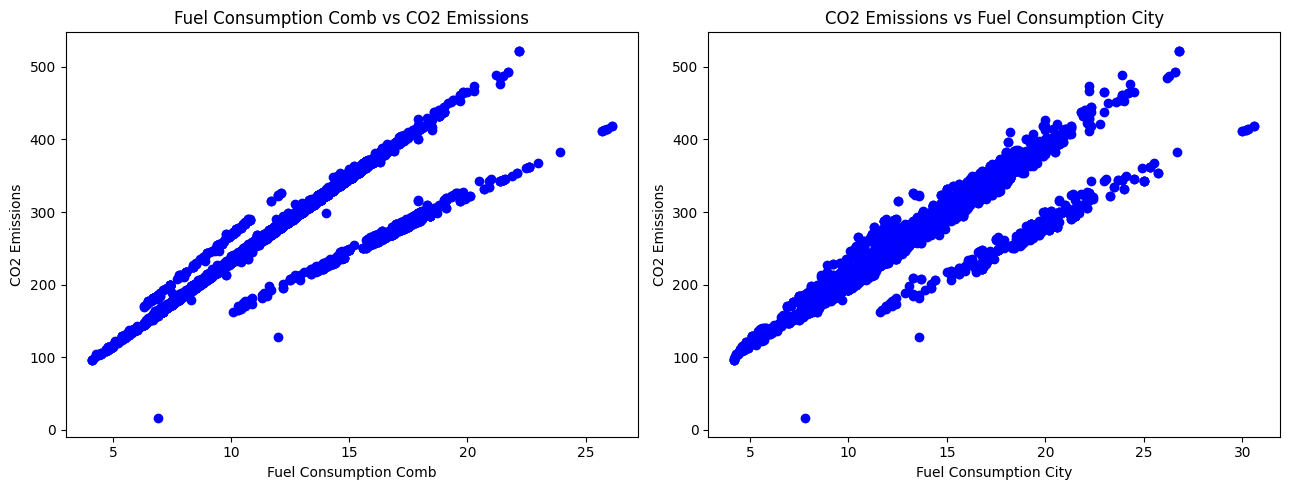

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.scatter(df["Fuel Consumption Comb (L/100 km)"], df["CO2 Emissions(g/km)"], color="b")
ax1.set_xlabel("Fuel Consumption Comb")
ax1.set_ylabel("CO2 Emissions")
ax1.set_title("Fuel Consumption Comb vs CO2 Emissions")

ax2.scatter(df["Fuel Consumption City (L/100 km)"], df["CO2 Emissions(g/km)"], color="b")
ax2.set_xlabel("Fuel Consumption City")
ax2.set_ylabel("CO2 Emissions")
ax2.set_title("CO2 Emissions vs Fuel Consumption City")

plt.tight_layout()
plt.show()

In [9]:
before = sdf.shape

z = zscore(sdf)
sdf = sdf[(np.abs(z) <= 3).all(axis=1)]

print(f"Removed Data: {before[0] - sdf.shape[0]}")
print(f"Before: {before}")
print(f"After: {sdf.shape}")

Removed Data: 91
Before: (7385, 3)
After: (7294, 3)


In [10]:
x = sdf[["Fuel Consumption City (L/100 km)", "Fuel Consumption Comb (L/100 km)"]]
y = sdf["CO2 Emissions(g/km)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [11]:
poly = PolynomialFeatures(degree=8)
x_train_poly = poly.fit_transform(x_train)

In [12]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

coef = model.coef_
intercept = model.intercept_

print(f"coef: {coef}\nintercept: {intercept}")

coef: [-2.21303786e-06  9.57670331e-01  2.89385082e-01  3.40467714e+00
  1.59691995e+00  1.33278629e-01  2.23846746e+00 -3.35950086e-01
 -2.20355417e+00 -3.48815014e+00 -2.43611204e-02 -7.31158858e-01
 -1.58259199e-01  5.10289390e-01  1.52496948e+00  1.23044704e+00
 -2.48061036e+00  5.07071551e-02  1.82187725e+00  3.83771708e-01
 -1.15934500e+00 -4.13966576e-02  3.80877981e-01 -1.28136226e+00
  1.10879709e+00  1.46949647e+00 -2.84658428e+00  1.22124599e+00
  2.35752816e-01 -1.39200999e+00  3.02623822e+00 -2.40692983e+00
 -9.69973467e-01  2.99262848e+00 -1.87381380e+00  3.87687186e-01
  3.43600397e-01 -2.41903127e+00  6.76098190e+00 -8.74299327e+00
  2.85275771e+00  6.22939624e+00 -8.61054933e+00  4.45531467e+00
 -8.69470684e-01]
intercept: 91.63344618089198


In [13]:
x_test_poly = poly.transform(x_test)
y_pred = model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 259.97
MAE: 6.99
R2 Score: 0.92


In [14]:
x_train_poly = poly.transform(x_train)
y_train_pred = model.predict(x_train_poly)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2

print(f"R2 Train: {r2_train:.3f}")
print(f"R2 Test: {r2_test:.3f}")
print(f"Difference (Train - Test): {r2_train - r2_test:.3f}")

R2 Train: 0.916
R2 Test: 0.918
Difference (Train - Test): -0.002


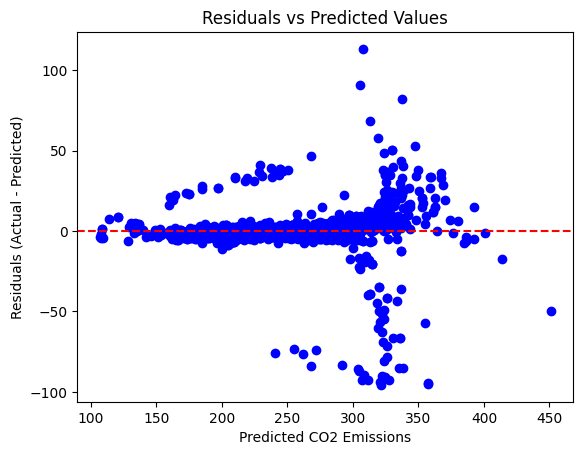

In [15]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()